In [284]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime



In [285]:
income_area = pd.read_csv('Resources/income_comparison.csv')
income_area = income_area.dropna()
income_area

,Description,Year,Total_Returns,Total_Income,Avg_Income,under80K_avg_income,under80K_total_returns,over80K_avg_income,over80K_total_returns,10000,...,45000,50000,60000,70000,80000,90000,100000,150000,250000,500000
0,Toronto,2017.0,4814770,253000000000,52547,36945,3964740,92979,850050,920380,...,207420,197570,316850,256120,212420,168910,151070,309470,139870,80730
1,Hamilton,2017.0,597420,30975792000,51849,41337,489400,81285,107990,83120,...,30700,29530,45390,36620,30080,23380,21290,39840,16240,7240
2,Niagara,2017.0,335910,14660909000,43645,39015,293690,65456,42230,44040,...,18970,18070,25400,18510,14140,10110,9250,15360,5320,2190
3,Guelph,2017.0,120580,6540254000,54240,44067,97490,78722,23100,15910,...,6290,6690,10660,8170,6490,4980,4530,8520,3610,1460
4,Barrie,2017.0,154660,7442638000,48123,40931,128350,72991,26310,21890,...,7700,7380,11680,9490,7780,6200,5710,9980,3210,1210
5,Toronto,2014.0,4573270,222000000000,48543,35733,3864830,86850,708440,948480,...,202000,180250,297590,236640,192290,151480,128880,253980,108170,65930
6,Hamilton,2014.0,576160,27760945000,48183,39926,484570,74966,91610,86870,...,31040,26840,43680,34220,27300,21290,19140,33060,12380,5740
7,Niagara,2014.0,322800,13160517000,40770,37109,287130,61565,35680,47330,...,18740,15290,23420,16390,12190,9200,7840,12940,4020,1680
8,Guelph,2014.0,113670,5671404000,49894,42655,94740,71105,18930,16320,...,6340,5900,10140,7600,5790,4540,3670,6990,2680,1050
9,Barrie,2014.0,146030,6579521000,45056,39639,124130,66527,21940,22640,...,7660,6580,11170,8540,7130,5730,4830,8060,2490,830


In [287]:
# income_area['Avg_Income'] = (income_area['Total_Income'])/(income_area['Total_Returns'])
income = income_area[['Total_Returns', 'Total_Income', 'Avg_Income',
       'under80K_avg_income', 'under80K_total_returns', 'over80K_avg_income',
       'over80K_total_returns', '10000',
       '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000',
       '60000', '70000', '80000', '90000', '100000', '150000', '250000',
       '500000']].astype(float)

In [288]:
income[['Region','Year']] = income_area[['Description','Year']]
income.set_index(['Region','Year'])

,,Total_Returns,Total_Income,Avg_Income,under80K_avg_income,under80K_total_returns,over80K_avg_income,over80K_total_returns,10000,15000,20000,...,45000,50000,60000,70000,80000,90000,100000,150000,250000,500000
Region,Year,,,,,,,,,,,,,,,,,,,,,
Toronto,2017.0,4814770.0,2.530000e+11,52547.0,36945.0,3964740.0,92979.0,850050.0,920380.0,420140.0,420270.0,...,207420.0,197570.0,316850.0,256120.0,212420.0,168910.0,151070.0,309470.0,139870.0,80730.0
Hamilton,2017.0,597420.0,3.097579e+10,51849.0,41337.0,489400.0,81285.0,107990.0,83120.0,47220.0,47360.0,...,30700.0,29530.0,45390.0,36620.0,30080.0,23380.0,21290.0,39840.0,16240.0,7240.0
Niagara,2017.0,335910.0,1.466091e+10,43645.0,39015.0,293690.0,65456.0,42230.0,44040.0,29930.0,31280.0,...,18970.0,18070.0,25400.0,18510.0,14140.0,10110.0,9250.0,15360.0,5320.0,2190.0
Guelph,2017.0,120580.0,6.540254e+09,54240.0,44067.0,97490.0,78722.0,23100.0,15910.0,8410.0,8350.0,...,6290.0,6690.0,10660.0,8170.0,6490.0,4980.0,4530.0,8520.0,3610.0,1460.0
Barrie,2017.0,154660.0,7.442638e+09,48123.0,40931.0,128350.0,72991.0,26310.0,21890.0,12720.0,12520.0,...,7700.0,7380.0,11680.0,9490.0,7780.0,6200.0,5710.0,9980.0,3210.0,1210.0
Toronto,2014.0,4573270.0,2.220000e+11,48543.0,35733.0,3864830.0,86850.0,708440.0,948480.0,430060.0,406980.0,...,202000.0,180250.0,297590.0,236640.0,192290.0,151480.0,128880.0,253980.0,108170.0,65930.0
Hamilton,2014.0,576160.0,2.776094e+10,48183.0,39926.0,484570.0,74966.0,91610.0,86870.0,48980.0,47920.0,...,31040.0,26840.0,43680.0,34220.0,27300.0,21290.0,19140.0,33060.0,12380.0,5740.0
Niagara,2014.0,322800.0,1.316052e+10,40770.0,37109.0,287130.0,61565.0,35680.0,47330.0,30780.0,32160.0,...,18740.0,15290.0,23420.0,16390.0,12190.0,9200.0,7840.0,12940.0,4020.0,1680.0
Guelph,2014.0,113670.0,5.671404e+09,49894.0,42655.0,94740.0,71105.0,18930.0,16320.0,8560.0,8270.0,...,6340.0,5900.0,10140.0,7600.0,5790.0,4540.0,3670.0,6990.0,2680.0,1050.0


In [291]:
income['Avg_Income'] = income['Total_Income']//income['Total_Returns']
income

,Total_Returns,Total_Income,Avg_Income,under80K_avg_income,under80K_total_returns,over80K_avg_income,over80K_total_returns,10000,15000,20000,...,60000,70000,80000,90000,100000,150000,250000,500000,Region,Year
0,4814770.0,2.530000e+11,52546.0,36945.0,3964740.0,92979.0,850050.0,920380.0,420140.0,420270.0,...,316850.0,256120.0,212420.0,168910.0,151070.0,309470.0,139870.0,80730.0,Toronto,2017.0
1,597420.0,3.097579e+10,51849.0,41337.0,489400.0,81285.0,107990.0,83120.0,47220.0,47360.0,...,45390.0,36620.0,30080.0,23380.0,21290.0,39840.0,16240.0,7240.0,Hamilton,2017.0
2,335910.0,1.466091e+10,43645.0,39015.0,293690.0,65456.0,42230.0,44040.0,29930.0,31280.0,...,25400.0,18510.0,14140.0,10110.0,9250.0,15360.0,5320.0,2190.0,Niagara,2017.0
3,120580.0,6.540254e+09,54239.0,44067.0,97490.0,78722.0,23100.0,15910.0,8410.0,8350.0,...,10660.0,8170.0,6490.0,4980.0,4530.0,8520.0,3610.0,1460.0,Guelph,2017.0
4,154660.0,7.442638e+09,48122.0,40931.0,128350.0,72991.0,26310.0,21890.0,12720.0,12520.0,...,11680.0,9490.0,7780.0,6200.0,5710.0,9980.0,3210.0,1210.0,Barrie,2017.0
5,4573270.0,2.220000e+11,48542.0,35733.0,3864830.0,86850.0,708440.0,948480.0,430060.0,406980.0,...,297590.0,236640.0,192290.0,151480.0,128880.0,253980.0,108170.0,65930.0,Toronto,2014.0
6,576160.0,2.776094e+10,48182.0,39926.0,484570.0,74966.0,91610.0,86870.0,48980.0,47920.0,...,43680.0,34220.0,27300.0,21290.0,19140.0,33060.0,12380.0,5740.0,Hamilton,2014.0
7,322800.0,1.316052e+10,40769.0,37109.0,287130.0,61565.0,35680.0,47330.0,30780.0,32160.0,...,23420.0,16390.0,12190.0,9200.0,7840.0,12940.0,4020.0,1680.0,Niagara,2014.0
8,113670.0,5.671404e+09,49893.0,42655.0,94740.0,71105.0,18930.0,16320.0,8560.0,8270.0,...,10140.0,7600.0,5790.0,4540.0,3670.0,6990.0,2680.0,1050.0,Guelph,2014.0
9,146030.0,6.579521e+09,45055.0,39639.0,124130.0,66527.0,21940.0,22640.0,12810.0,12310.0,...,11170.0,8540.0,7130.0,5730.0,4830.0,8060.0,2490.0,830.0,Barrie,2014.0


In [280]:
# income = income.groupby(['Region','Year'])
# income

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

Region    Year  
Barrie    2010.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2014.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2017.0    AxesSubplot(0.125,0.125;0.775x0.755)
Guelph    2010.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2014.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2017.0    AxesSubplot(0.125,0.125;0.775x0.755)
Hamilton  2010.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2014.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2017.0    AxesSubplot(0.125,0.125;0.775x0.755)
Niagara   2010.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2014.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2017.0    AxesSubplot(0.125,0.125;0.775x0.755)
Toronto   2010.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2014.0    AxesSubplot(0.125,0.125;0.775x0.755)
          2017.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

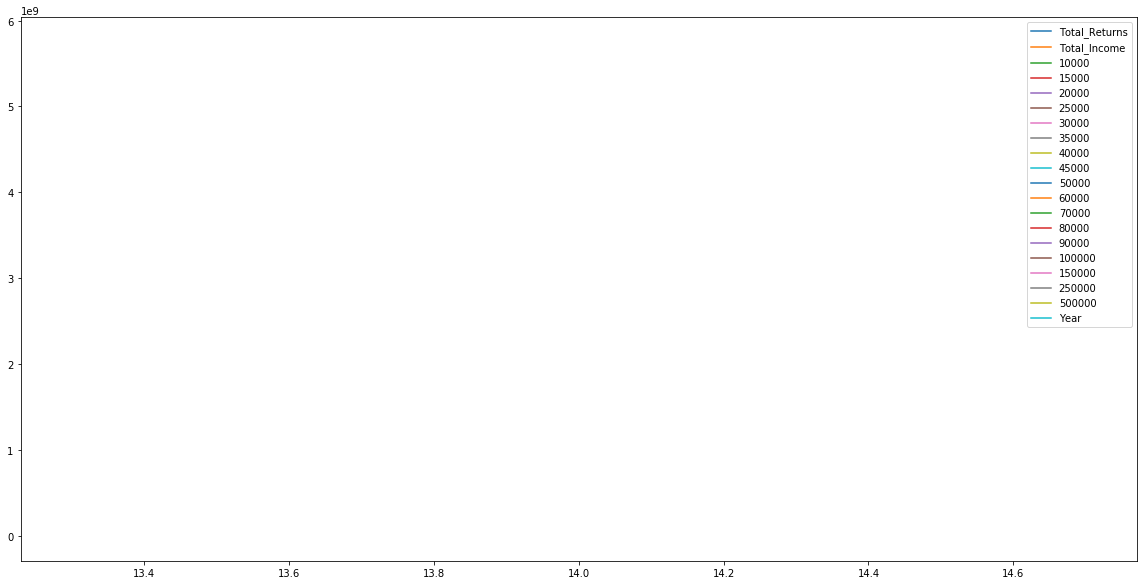

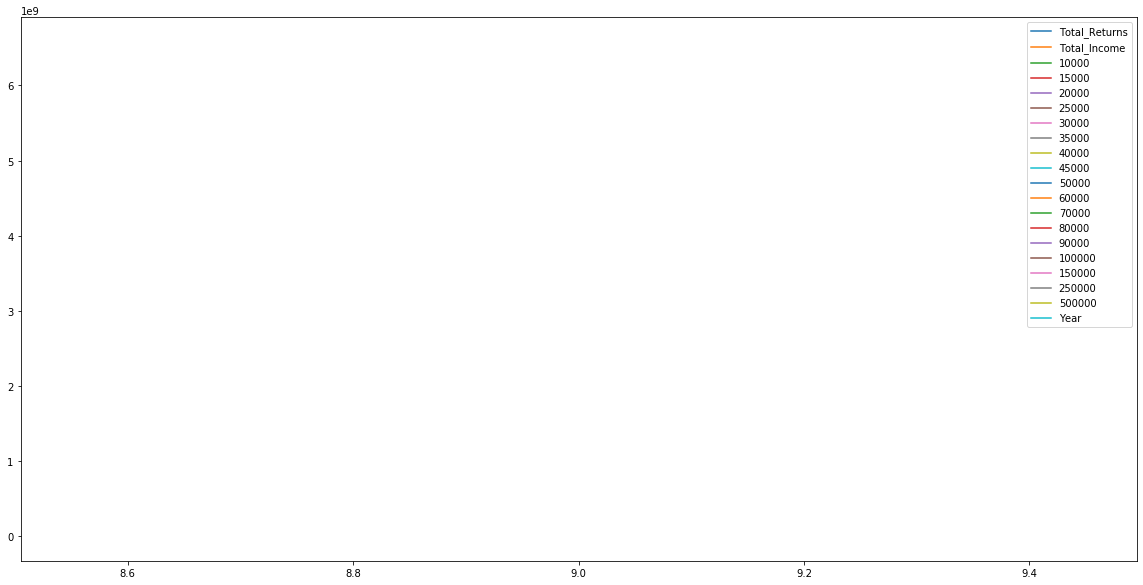

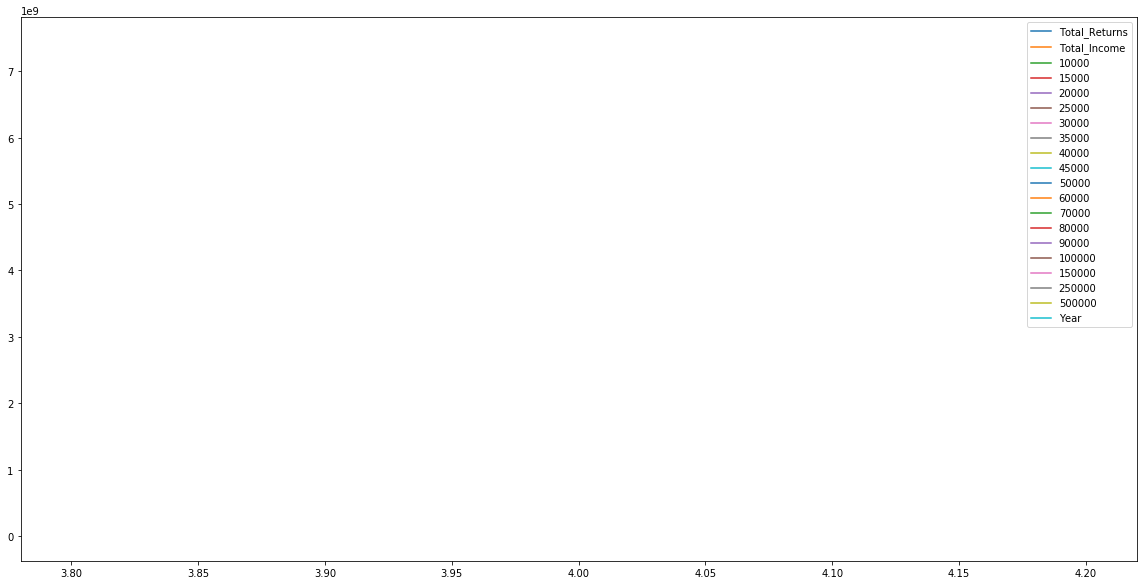

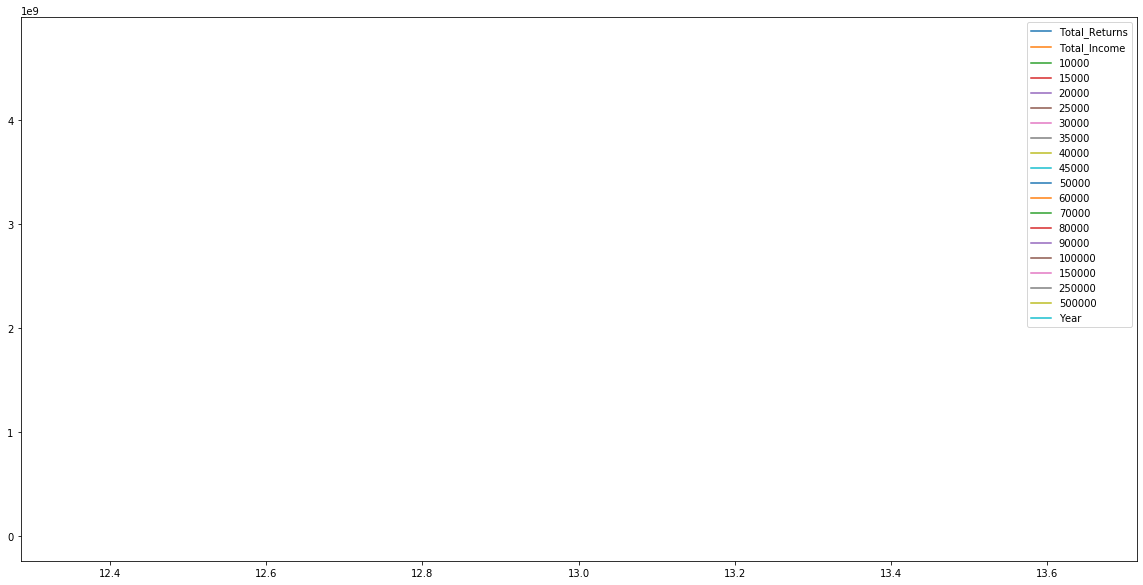

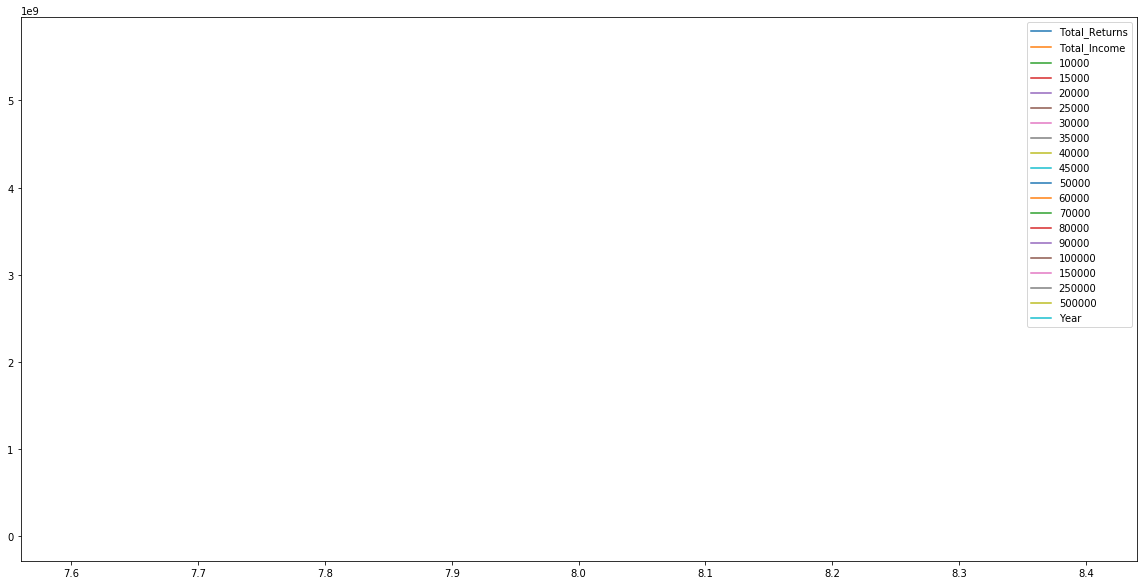

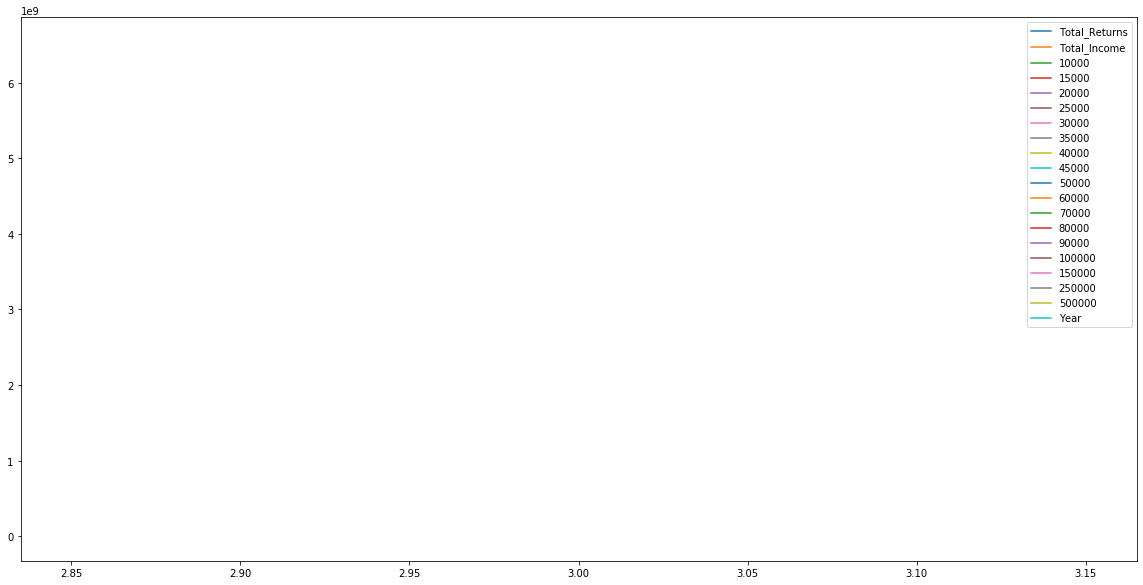

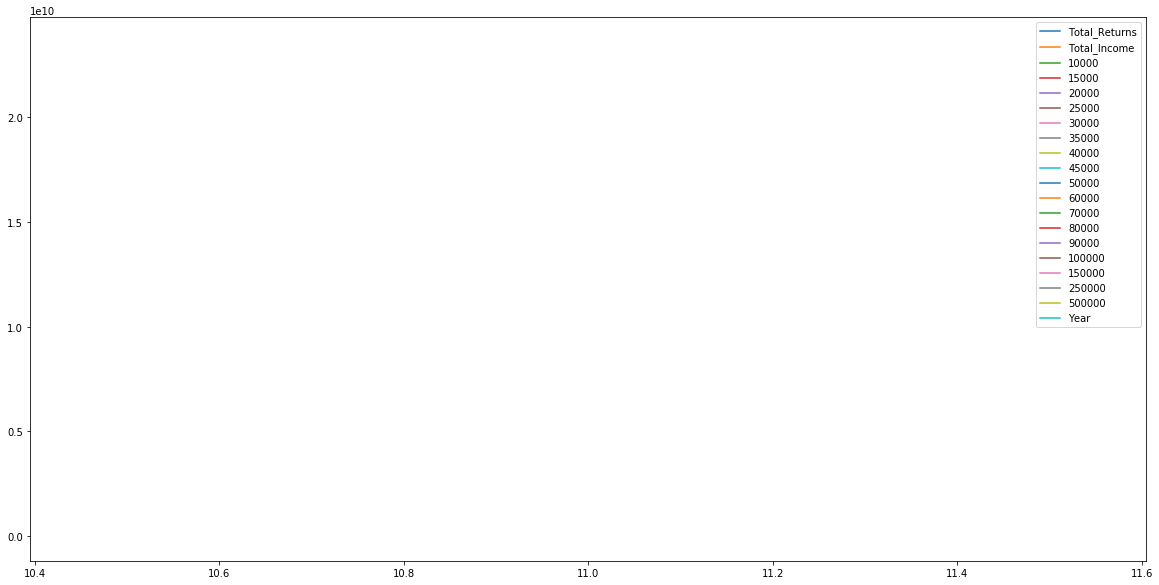

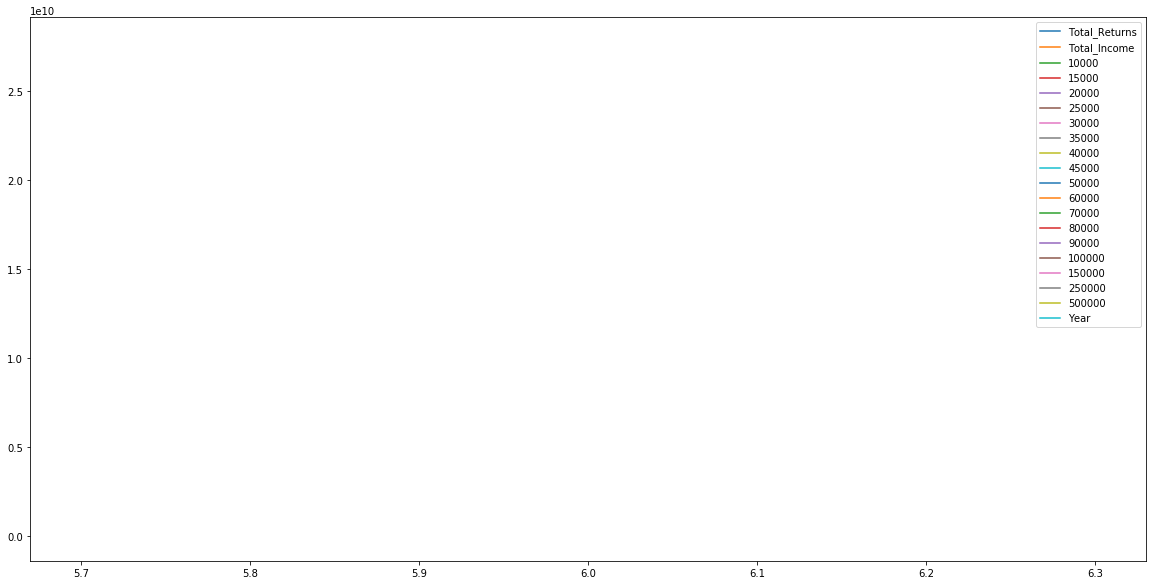

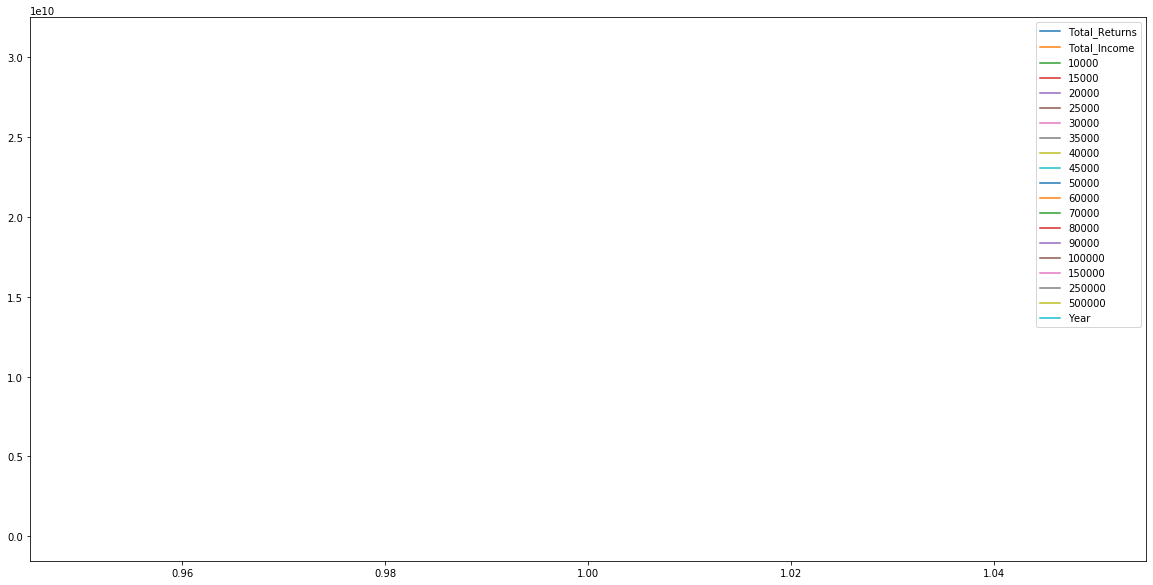

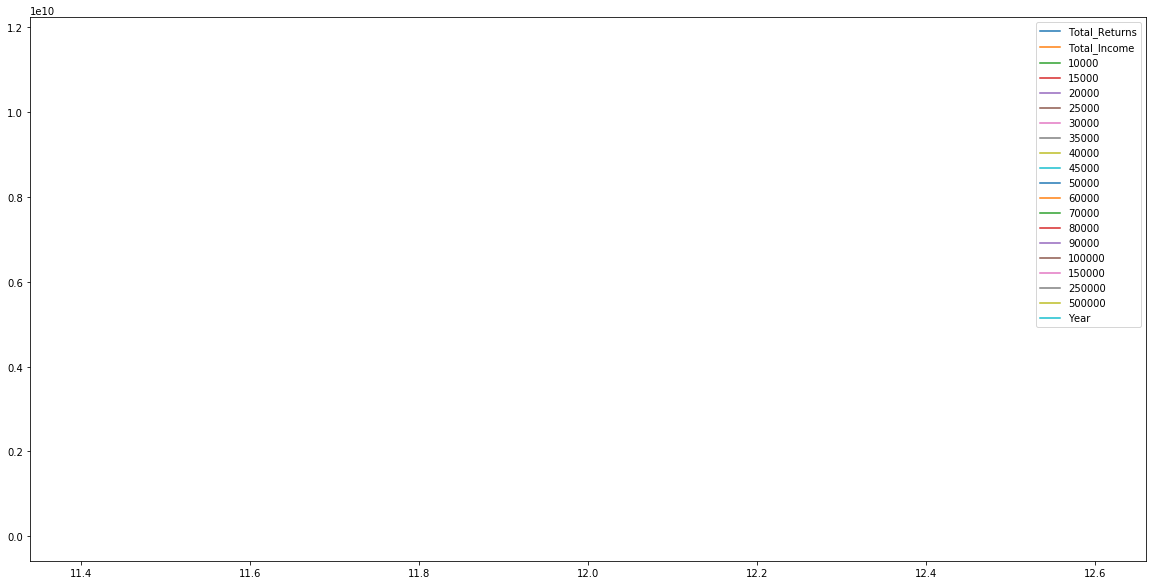

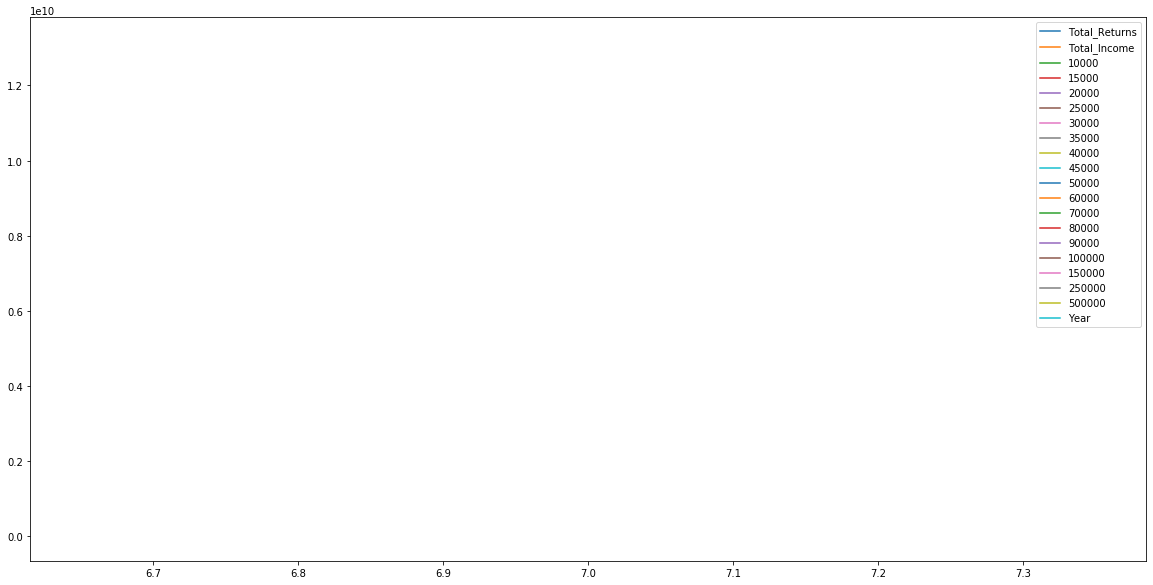

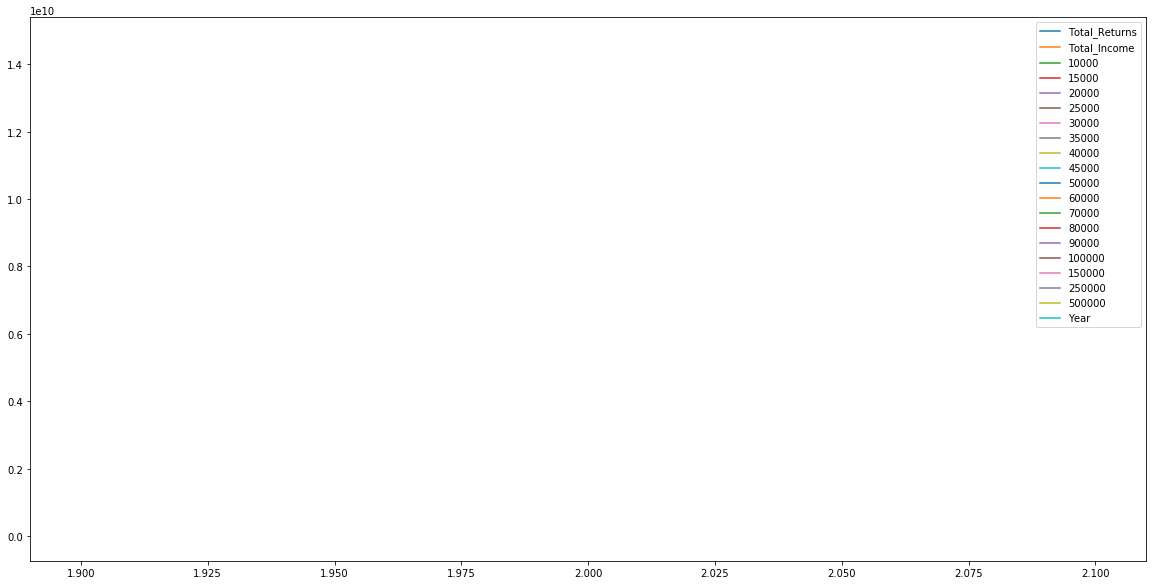

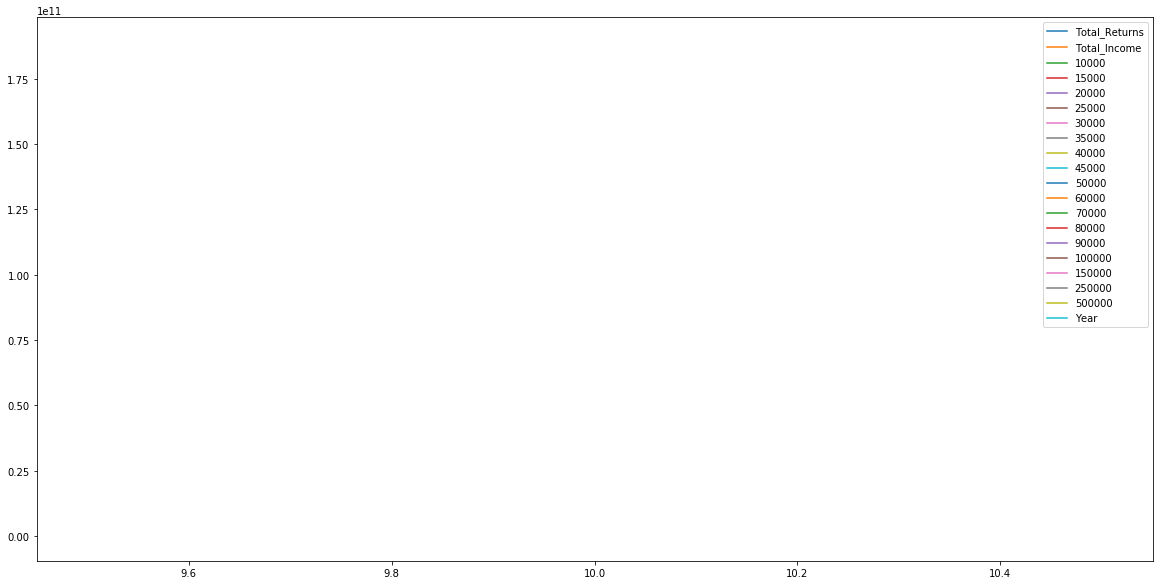

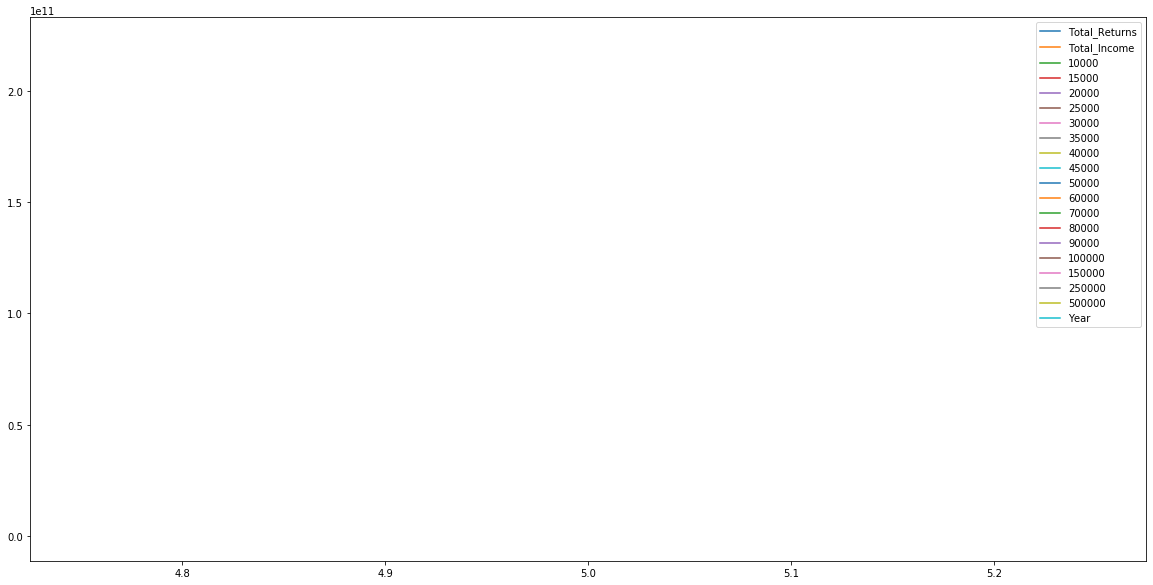

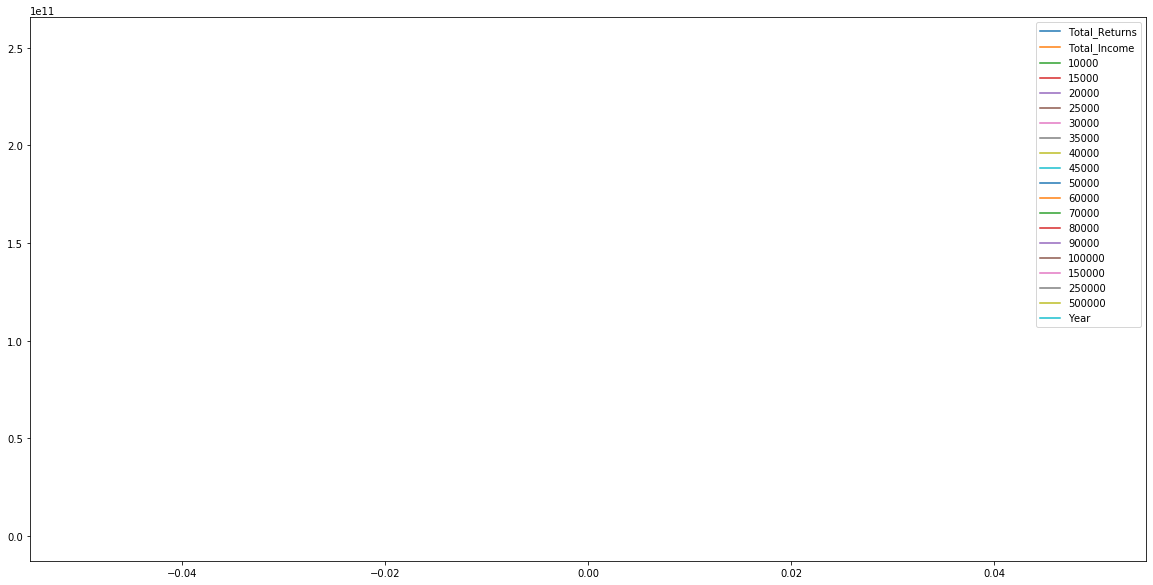

In [282]:
# x_axis = income_area['Year']
# y_axis = income_area['Avg_Income']
# income.plot.line(figsize=(20,10), subplots=False)

In [241]:
# grouped_income_area = income_area.groupby(['Description','Year'])
# grouped_income_area

In [292]:
housing_prices = pd.read_csv('Resources/housing_prices.csv')
housing_prices

,Date,Area,Composite_HPI,Two_Storey_HPI,Apartment_HPI,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0
...,...,...,...,...,...,...,...,...
1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
income = pd.read_csv('Resources/Income - Toronto.csv')
income.head()

,REF_DATE,GEO,DGUID,Sex,Age group,Persons with income,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2000,"Toronto, Ontario",2016S0503535,Both sexes,All age groups,Total persons with income,Number,223,units,0,v20797165,19.1.1.1,3371060,NaN,NaN,NaN,0
1,2000,"Toronto, Ontario",2016S0503535,Both sexes,All age groups,"Persons with income under $5,000",Number,223,units,0,v20797166,19.1.1.2,415550,NaN,NaN,NaN,0
2,2000,"Toronto, Ontario",2016S0503535,Both sexes,All age groups,"Persons with income of $5,000 and over",Number,223,units,0,v20797167,19.1.1.3,2955520,NaN,NaN,NaN,0
3,2000,"Toronto, Ontario",2016S0503535,Both sexes,All age groups,"Persons with income of $10,000 and over",Number,223,units,0,v20797168,19.1.1.4,2584590,NaN,NaN,NaN,0
4,2000,"Toronto, Ontario",2016S0503535,Both sexes,All age groups,"Persons with income of $15,000 and over",Number,223,units,0,v20797169,19.1.1.5,2204370,NaN,NaN,NaN,0


In [294]:
housing_prices = housing_prices.dropna()
housing_prices.shape

(1110, 8)

Original database was relatively clean. Only 14 rows contained na values 

In [295]:
housing_prices[['Month','Year']] = housing_prices.Date.str.split(" ", expand=True)
housing_prices.head()

C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Date,Area,Composite_HPI,Two_Storey_HPI,Apartment_HPI,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark,Month,Year
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0,Jan,2005
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0,Feb,2005
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0,Mar,2005
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0,Apr,2005
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0,May,2005


In [296]:
clean_housing_prices = housing_prices[['Area','Year','Month','Composite_Benchmark','Two_Storey_Benchmark','Apartment_Benchmark']]
clean_housing_prices

,Area,Year,Month,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
0,Barrie_and_District,2005,Jan,209000.0,220600.0,166400.0
1,Barrie_and_District,2005,Feb,212100.0,223200.0,166900.0
2,Barrie_and_District,2005,Mar,214800.0,227000.0,167400.0
3,Barrie_and_District,2005,Apr,216300.0,228100.0,167900.0
4,Barrie_and_District,2005,May,218400.0,229400.0,168400.0
...,...,...,...,...,...,...
1105,Oakville_Milton,2020,Jan,1048400.0,1100600.0,553600.0
1106,Oakville_Milton,2020,Feb,1078000.0,1137900.0,555400.0
1107,Oakville_Milton,2020,Mar,1113200.0,1177500.0,565900.0
1108,Oakville_Milton,2020,Apr,1096900.0,1149300.0,574900.0


In [297]:
clean_housing_prices.dtypes


Area                     object
Year                     object
Month                    object
Composite_Benchmark     float64
Two_Storey_Benchmark    float64
Apartment_Benchmark     float64
dtype: object

In [301]:
group_area_year_month = clean_housing_prices.groupby(['Area','Year','Month']).mean()
group_area_year_month

Composite_Benchmark  Two_Storey_Benchmark  \
Area                Year Month                                              
Barrie_and_District 2005 Apr               216300.0              228100.0   
                         Aug               221300.0              232300.0   
                         Dec               228600.0              236900.0   
                         Feb               212100.0              223200.0   
                         Jan               209000.0              220600.0   
...                                             ...                   ...   
Oakville_Milton     2020 Apr              1096900.0             1149300.0   
                         Feb              1078000.0             1137900.0   
                         Jan              1048400.0             1100600.0   
                         Mar              1113200.0             1177500.0   
                         May              1100000.0             1148100.0   

                                Apartment_Benchmark  
Area                Year Month                       
Barrie_and_District 2005 Apr               167900.0  
                         Aug               166000.0  
                         Dec               179000.0  
                         Feb               166900.0  
                         Jan               166400.0  
...                                             ...  
Oakville_Milton     2020 Apr               574900.0  
                         Feb               555400.0  
                         Jan               553600.0  
                         Mar               565900.0  
                         May               596600.0  

[1110 rows x 3 columns]

In [299]:
group_area_year = round(clean_housing_prices.groupby(['Area','Year']).mean(),2)
group_area_year

Composite_Benchmark  Two_Storey_Benchmark  \
Area                Year                                              
Barrie_and_District 2005            219216.67             230575.00   
                    2006            231550.00             243466.67   
                    2007            242291.67             253441.67   
                    2008            251083.33             262891.67   
                    2009            249108.33             260575.00   
...                                       ...                   ...   
Oakville_Milton     2016            861641.67             908275.00   
                    2017           1005183.33            1055475.00   
                    2018            980391.67            1023475.00   
                    2019           1013375.00            1060550.00   
                    2020           1087300.00            1142680.00   

                          Apartment_Benchmark  
Area                Year                       
Barrie_and_District 2005            168883.33  
                    2006            179375.00  
                    2007            188266.67  
                    2008            197891.67  
                    2009            194591.67  
...                                       ...  
Oakville_Milton     2016            424600.00  
                    2017            502708.33  
                    2018            521750.00  
                    2019            544275.00  
                    2020            569280.00  

[96 rows x 3 columns]

In [302]:
group_area_year.reset_index(level=['Year'])

,Year,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
Area,,,,
Barrie_and_District,2005,219216.67,230575.00,168883.33
Barrie_and_District,2006,231550.00,243466.67,179375.00
Barrie_and_District,2007,242291.67,253441.67,188266.67
Barrie_and_District,2008,251083.33,262891.67,197891.67
Barrie_and_District,2009,249108.33,260575.00,194591.67
...,...,...,...,...
Oakville_Milton,2016,861641.67,908275.00,424600.00
Oakville_Milton,2017,1005183.33,1055475.00,502708.33
Oakville_Milton,2018,980391.67,1023475.00,521750.00


In [303]:

group_comp = group_area_year.Composite_Benchmark

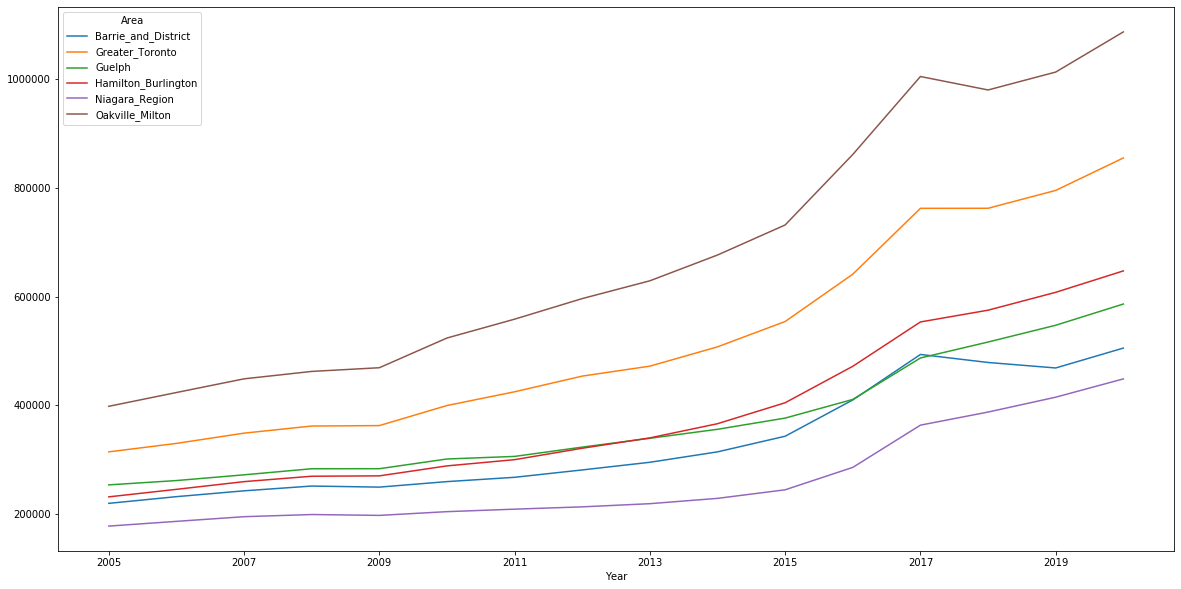

In [304]:
group_comp.unstack(level='Area').plot.line(figsize=(20,10), subplots=False)

In [ ]:
group_twostorey = group_area_year.Two_Storey_Benchmark

In [ ]:
group_twostorey.unstack(level='Area').plot.line(figsize=(20,10), subplots=False)

In [ ]:
group_apart = group_area_year.Apartment_Benchmark

In [ ]:
group_apart.unstack(level='Area').plot.line(figsize=(20,10), subplots=False)

In [ ]:
group_gta = group_area_year.reset_index(level='Area')
group_gta = group_gta.loc[group_gta['Area']== 'Greater_Toronto']

In [ ]:
group_gta.plot.line(figsize=(20,10), subplots=False)

In [ ]:
group_hambur = group_area_year.reset_index(level='Area')
group_hambur = group_hambur.loc[group_hambur['Area']== 'Hamilton_Burlington']

In [ ]:
group_hambur.plot.line(figsize=(20,10), subplots=False)

In [ ]:
group_barrie = group_area_year.reset_index(level='Area')
group_barrie = group_barrie.loc[group_barrie['Area']== 'Barrie_and_District']

In [ ]:
group_barrie.plot.line(figsize=(20,10), subplots=False)

In [ ]:
group_oakmilt = group_area_year.reset_index(level='Area')
group_oakmilt = group_oakmilt.loc[group_oakmilt['Area']== 'Oakville_Milton']

In [ ]:
group_oakmilt.plot.line(figsize=(20,10), subplots=False)